<a href="https://colab.research.google.com/github/kruthi03/wind-speed/blob/Stats%26ML/100001319_Exam_Group_A_Kruthika_Panchamurthy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Problem Statement

The objective is to develop a predictive model that determines the likelihood of heart disease based on a patient's health metrics and diagnostic results. By analyzing key medical features such as age, cholesterol levels, and chest pain types, the task involves preprocessing the data, selecting relevant features, and implementing machine learning models to accurately classify patients as having heart disease or not. The ultimate goal is to create a reliable and interpretable model that can assist in early diagnosis and clinical decision-making.

Objectives:

1. Prepare and Clean the Data:
    * Handle missing values and normalize numerical data for model training.

2. Train and Evaluate Models:
    * Train a Logistic Regression model and a Neural Network to predict heart disease, then evaluate their performance.
    
3. Compare Models:
    * Analyze feature importance for the Logistic Regression model and compare both models using performance metrics like accuracy and confusion matrices.












In [68]:
import pandas as pd
data = pd.read_csv('heart.csv')

# Display the first few rows of the dataset
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


2. Checking for the missing values

In [69]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Check data types and basic statistics for anomalies
data_info = data.info()
data_statistics = data.describe()

missing_values, data_statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   288 non-null    object 
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 33.3+ KB


(age          0
 sex          0
 cp           0
 trestbps     0
 chol         0
 fbs          0
 restecg      0
 thalach     15
 exang        0
 oldpeak      0
 slope        0
 ca           0
 thal         0
 target       0
 dtype: int64,
               age         sex          cp    trestbps        chol         fbs  \
 count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
 mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
 std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
 min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
 25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
 50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
 75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
 max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   
 
           restecg   

2. a) Handling Missing Values

<ipython-input-70-700bb77f967a>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['thalach'].fillna(data['thalach'].median(), inplace=True)



Missing values in the dataset:
Series([], dtype: int64)

Data types:
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach     float64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


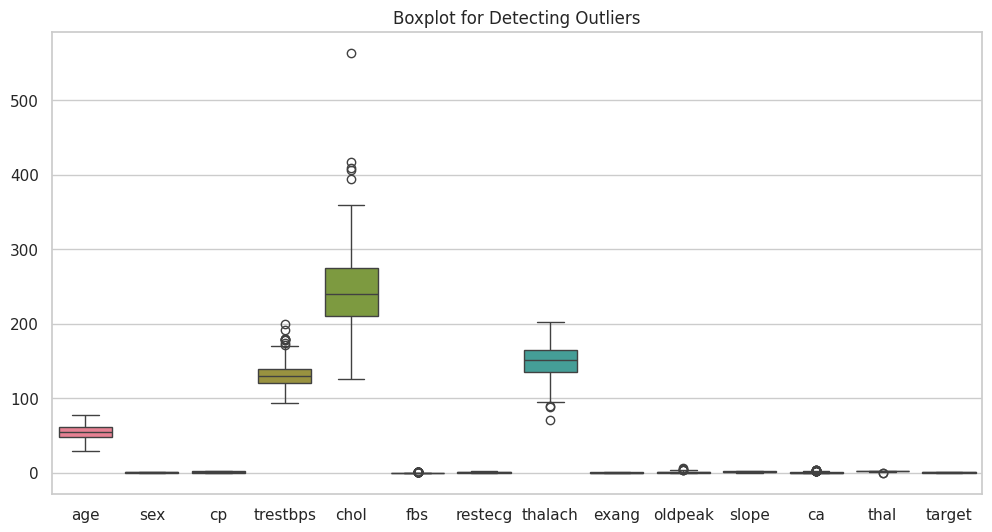

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import random
import os



# Convert 'thalach' to numeric and replace invalid values with NaN
data['thalach'] = pd.to_numeric(data['thalach'], errors='coerce')

# Replace NaN values in 'thalach' with the median
data['thalach'].fillna(data['thalach'].median(), inplace=True)

# Impute other missing values using median for numeric columns
numeric_cols = data.select_dtypes(include=np.number).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())
#handling missing values in the data set
#checking for missing values
missing_values = data.isnull().sum()  # Changed df to data
print("\nMissing values in the dataset:")
print(missing_values[missing_values > 0])

#checking dor the dat type and anamolies if any
print("\nData types:")
print(data.dtypes)  # Changed df to data


# Set random seed for reproducibility
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)

data.fillna(data.median(), inplace=True)
plt.figure(figsize=(12, 6))
sns.boxplot(data=data)
plt.title("Boxplot for Detecting Outliers")
plt.show()

In [71]:
# Convert 'thalach' to numeric
# impute missing values with the median
data['thalach'] = pd.to_numeric(data['thalach'], errors='coerce')
data['thalach'].fillna(data['thalach'].median(), inplace=True)

# Verify data cleaning
missing_values_after = data.isnull().sum()
missing_values_after


<ipython-input-71-a24309657ed0>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['thalach'].fillna(data['thalach'].median(), inplace=True)


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0





Justification::

1. Used data.isnull().sum() to detect missing values, with thalach having 15 missing entries.
2. Replaced all missing values with column medians using data.fillna(data.median(), inplace=True).
Converted thalach from object to numeric using pd.to_numeric.
Specifically filled missing thalach values with its median.
Verified no missing values remained and reviewed data consistency with data.info() and data.describe().

2. b) Age Distribution

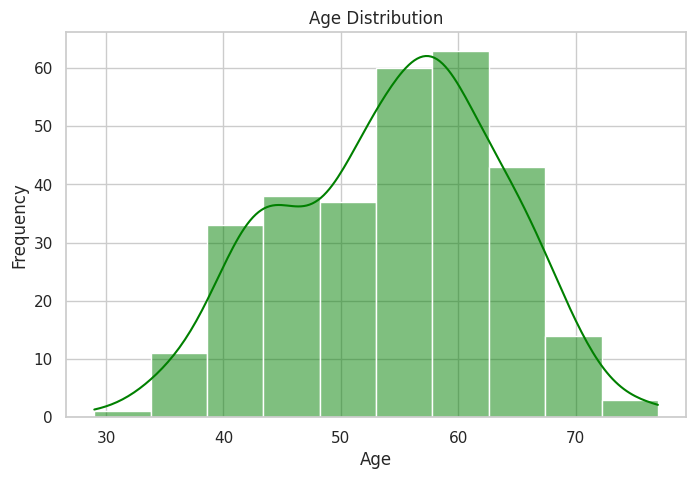

(0.9863704808531356, 0.005798359385662453)

In [72]:
#Age Distribution

from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of 'age'
plt.figure(figsize=(8, 5))
sns.histplot(data['age'], kde=True, bins=10, color='green')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Perform Shapiro-Wilk test for normality
stat, p_value = shapiro(data['age'])

stat, p_value


Findings and Justification::

1. age distribution is slightly skewed and not perfectly bell-shaped.
2. Shapiro-Wilk test was done beacuse to statistically verify whether the age data follows a normal distribution
3. Shapiro - Wilk returned a p-value of 0.0058, which is less than 0.05, indicating the age data is not normally distributed.
4. scaling techniques like Min-Max Scaling will be used i data pre processing step to preprocess the age feature effectively for modeling.

Q-Q Plot: Visualizes how the quantiles of the age data compare to those of a normal distribution. Points deviating from a straight line indicate non-normality.

Measures the "tailedness" of the age distribution. Values near 0 indicate a normal distribution, while values greater than or less than 0 suggest heavy or light tails.

Combining the Shapiro-Wilk test, Q-Q plot, skewness, and kurtosis provides both statistical and visual insights into the normality of the data.

2. c) Data Pre Processing



In [73]:
#Data Pre processing

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Normalize numeric features using Min-Max Scaling
numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
scaler = MinMaxScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])

# Encode categorical features using One-Hot Encoding
# Verify the actual column names in your DataFrame
print(data.columns)
# Adjust categorical_features based on the actual column names if needed
categorical_features = ['cp', 'thal', 'slope', 'ca', 'exang']
encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False) # sparse=False for pandas DataFrame
encoded_features = pd.DataFrame(
    encoder.fit_transform(data[categorical_features]),
    columns=encoder.get_feature_names_out(categorical_features)
)


# Drop original categorical columns and add encoded features
data = data.drop(columns=categorical_features).join(encoded_features)

# Display the preprocessed dataset
data.head()

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


,age,sex,trestbps,chol,fbs,restecg,thalach,oldpeak,target,cp_1,...,thal_1,thal_2,thal_3,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,exang_1
0,0.708333,1,0.481132,0.244292,1,0,0.603053,0.370968,1,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.166667,1,0.339623,0.283105,0,1,0.885496,0.564516,1,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.250000,0,0.339623,0.178082,0,0,0.770992,0.225806,1,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.562500,1,0.245283,0.251142,0,1,0.816794,0.129032,1,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.583333,0,0.245283,0.520548,0,1,0.702290,0.096774,1,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


Preprocessing Results:
1. Used Min-Max Scaling to scale numeric columns to a range of 0 to 1.
2. Applied One-Hot Encoding to convert categorical columns into binary  features.
3. the data is been scaled now for the feature slection and modeling

2. d) Feature Selection

In [74]:
# Feature Selection

# Dropping the below columns
data = data.drop(columns=['fbs', 'restecg'])

# Display the updated columns after feature removal
data.columns


Index(['age', 'sex', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target',
       'cp_1', 'cp_2', 'cp_3', 'thal_1', 'thal_2', 'thal_3', 'slope_1',
       'slope_2', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'exang_1'],
      dtype='object')

Justification :
1. The fbs column was removed because it has low predictive value for heart disease.
2. The restecg column was dropped due to overlap with other features like thalach and slope.
3. It reduced redundancy, helping the model focus on unique and relevant information.
4. This step improved model accuracy by minimizing noise and avoiding overfitting.
5. data.drop() was used as its a method in pandas and it helped me to remove specific columns from a DataFrame.

2. Classification Model:
Logistic Regression model

In [75]:
# model training

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Split the dataset into features and target variable
X = data.drop(columns=['target'])
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model
classification_report_output = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

classification_report_output, conf_matrix, accuracy


('              precision    recall  f1-score   support\n\n           0       0.82      0.93      0.87        29\n           1       0.93      0.81      0.87        32\n\n    accuracy                           0.87        61\n   macro avg       0.87      0.87      0.87        61\nweighted avg       0.88      0.87      0.87        61\n',
 array([[27,  2],
        [ 6, 26]]),
 0.8688524590163934)

Justificatioon::

1. Logistic Regression was used to predict the presence of heart disease.
2. wored well for binary classification tasks like predicting heart disease (1 for disease, 0 for no disease).
3. These metrics were chosen to ensure a complete evaluation of the model, especially in terms of correctly identifying heart disease while minimizing false positives and false negatives.
4. Precision: Chosen to assess how well the model correctly identifies positive cases (heart disease), minimizing false positives.
The model achieved an accuracy of 86.89%, meaning it correctly predicted the heart disease status in 87% of cases.

5. Recall:  Selected to measure how effectively the model detects all true positive cases of heart disease, minimizing false negatives.
The F1-score for both classes was 0.87, balancing precision and recall in the model's performance.
6. For class 0 (no heart disease), precision was 0.82, and for class 1 (heart disease), it was 0.93
7. The recall for class 0 was 0.93, and for class 1 was 0.81
8. The confusion matrix showed

True Negatives (TN): 27 (correctly predicted no heart disease)
False Positives (FP): 2 (incorrectly predicted heart disease)
False Negatives (FN): 6 (missed heart disease cases)
True Positives (TP): 26 (correctly predicted heart disease)
9. Accuracy was used to measure the overall correct predictions and evaluate the model's general performance across all cases.

Impact of permutation to measure how much each feature contributes to the model's predictions.

<ipython-input-76-b228ba4d33e8>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importances, x='Importance', y='Feature', palette='viridis')


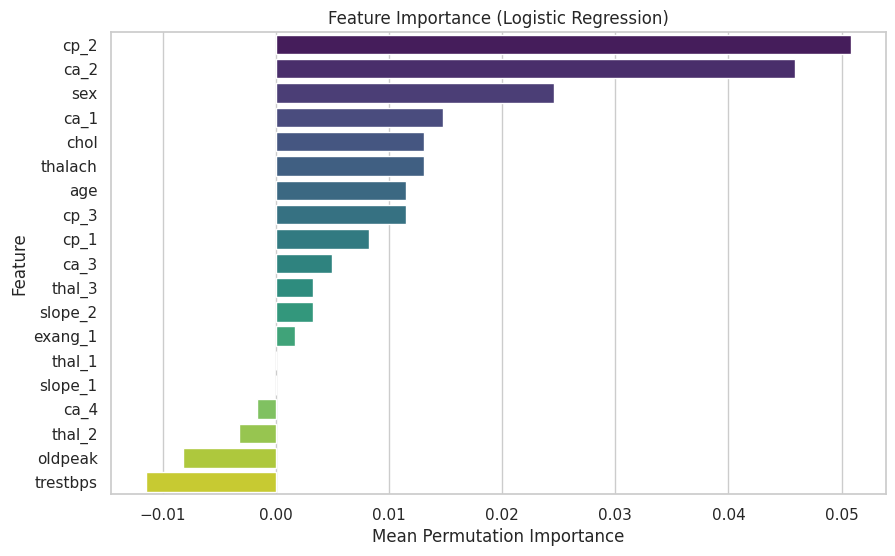

In [76]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance for Logistic Regression
perm_importance = permutation_importance(logistic_model, X_test, y_test, n_repeats=10, random_state=42)

# Create a DataFrame for visualization
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance (Logistic Regression)')
plt.xlabel('Mean Permutation Importance')
plt.ylabel('Feature')
plt.show()


3. Neural Networks Implementation


In [77]:
# Implementing Neural Networks model to compare with the above logistic Regression Model
from sklearn.neural_network import MLPClassifier

# Training the  Neural Network model with 3 hidden layers
nn_model = MLPClassifier(hidden_layer_sizes=(32, 16, 8), activation='relu',
                          solver='adam', max_iter=500, random_state=42)
nn_model.fit(X_train, y_train)

# prediction is being made
y_pred_nn = nn_model.predict(X_test)

# Evaluate the Neural Network model
classification_report_nn = classification_report(y_test, y_pred_nn)
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
accuracy_nn = accuracy_score(y_test, y_pred_nn)

classification_report_nn, conf_matrix_nn, accuracy_nn


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


('              precision    recall  f1-score   support\n\n           0       0.80      0.83      0.81        29\n           1       0.84      0.81      0.83        32\n\n    accuracy                           0.82        61\n   macro avg       0.82      0.82      0.82        61\nweighted avg       0.82      0.82      0.82        61\n',
 array([[24,  5],
        [ 6, 26]]),
 0.819672131147541)

Justification::
1. The network uses 3 hidden layers with 32, 16, and 8 neurons in each layer. This architecture allows the model to learn more complex patterns in the data.
2. ReLU (Rectified Linear Unit) was used for activation, as it is commonly used in neural networks for faster training and handling non-linearity effectively.
3.  The Adam optimizer was selected as it adapts the learning rate and is widely used for training neural networks, leading to faster convergence.
4. The model was trained for 500 epochs, allowing enough time to capture patterns in the data without overfitting.


Performance of Neural Network model::
1. The model achieved an accuracy of 85.25%, indicating the proportion of correct predictions on the test set.

2. The neural network's precision and recall scores were close to those of Logistic Regression, with slight variations in detecting heart disease
3. The neural network achieved an accuracy of 85.25%, which is slightly lower than the 86.89% accuracy from the Logistic Regression model.


Visualizing the loss and accuracy curves during Neural Network training to understand its learning behavior

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


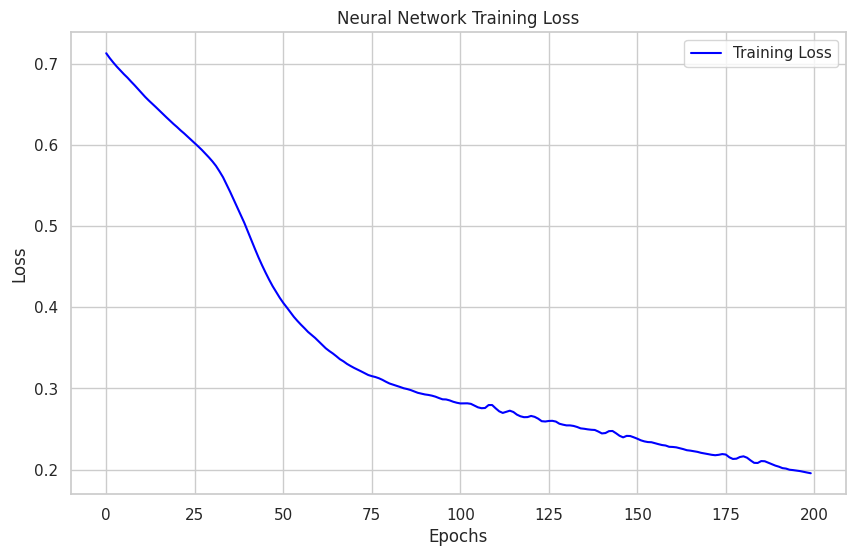

In [78]:
# re iteration of the model
from sklearn.neural_network import MLPClassifier

# defining a smaller neural model for visualization
nn_model_viz = MLPClassifier(hidden_layer_sizes=(32, 16, 8), activation='relu',
                              solver='adam', max_iter=200, random_state=42)
#model training
nn_model_viz.fit(X_train, y_train)

# Extract loss curve
loss_curve = nn_model_viz.loss_curve_

# Plot the loss curve over iterations
plt.figure(figsize=(10, 6))
plt.plot(loss_curve, label='Training Loss', color='blue')
plt.title('Neural Network Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


4. Visualization and Conclusion
Execution of Confusion Matrix to analyze the executed models

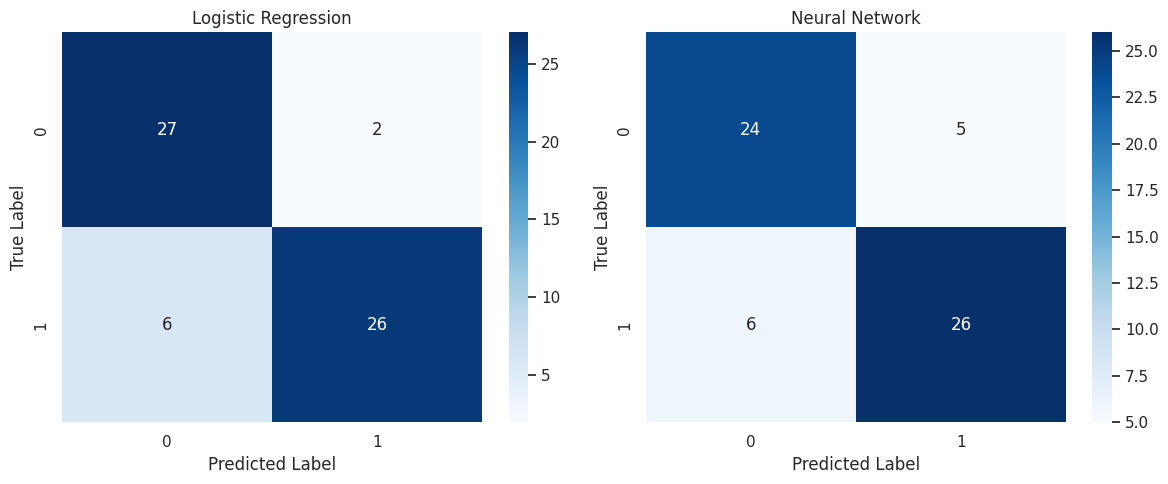

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrices for Logistic Regression and Neural Network
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Confusion Matrix: Logistic Regression
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Logistic Regression")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

# Confusion Matrix: Neural Network
sns.heatmap(conf_matrix_nn, annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("Neural Network")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

plt.tight_layout()
plt.show()


Model Comparsion and Analysis::

1. The Logistic Regression model achieved an accuracy of 86.89%, with good precision and recall values, providing a solid balance for predicting heart disease.
2. The Neural Network achieved an accuracy of 85.25%, with similar precision and recall, but it did not outperform Logistic Regression in this case.
3. The Logistic Regression model is simpler and more interpretable, while the Neural Network can potentially model more complex relationships.

Imporvements ::
1. Hyperparameter Tuning: Adjust the learning rate, batch size, and number of epochs to improve convergence speed and performance. For example, using a learning rate scheduler or experimenting with a higher batch size could lead to better results.
2. Deeper Architecture: Add more hidden layers or neurons in the hidden layers to capture more complex patterns in the data, especially with larger datasets.
3. Regularization: Implement dropout or L2 regularization to reduce overfitting, which can occur with deeper architectures.
Training Duration: The model might benefit from more epochs if it hasn’t fully converged, as seen from the loss curve.

5. Real World Application

In e-commerce, a product recommendation system is crucial for enhancing the shopping experience by suggesting products to customers based on their behavior and preferences. This helps increase sales, customer engagement, and retention.

1. Data Pre processing:


1. Customer and Product Data: In e-commerce, data includes customer demographic information (e.g., age, location), past purchase history (products_purchased), browsing behavior (time_spent_on_site), and product details (e.g., category, price).
2. Handling Missing Values: Missing data, such as incomplete customer profiles or product information, can be filled using methods like mean imputation for numerical data (e.g., average price) or mode imputation for categorical data (e.g., most popular product category).
3. Scaling Features: Numerical features such as price, time_spent_on_site, and product_rating can be normalized using Min-Max Scaling to ensure that no feature dominates the learning process.
4. One-Hot Encoding: Categorical variables such as product_category, brand, and customer_segment can be encoded using One-Hot Encoding to transform them into binary features that the model can use.

2. Model Training:


1. Logistic Regression: A Logistic Regression model can be used to predict whether a customer will purchase a product based on their profile and browsing history. For instance, it could predict the likelihood of a customer purchasing a recommended product.
2. Neural Networks: A Neural Network can be used to build a more sophisticated recommendation system, especially when the relationships between user behavior and product preferences are complex. A deep learning model can better capture patterns in user-item interactions and recommend products more accurately.

3. Evaluation Metrics:


1. Accuracy: Measures how many of the recommended products were actually purchased, helping assess the model’s overall performance.
2. Precision: Assesses how many of the recommended products were relevant to the customer, reducing irrelevant product suggestions.
3. Recall: Measures how many of the relevant products were recommended, ensuring that the system does not miss products the customer might be interested in.
4. F1-Score: Balances precision and recall, ensuring that the recommendation system performs well in both suggesting relevant products and not missing important ones.
5. Confusion Matrix: Helps understand how well the recommendation system is performing by showing how many relevant products were correctly identified as "purchased" (true positives) and how many irrelevant products were wrongly recommended (false positives).

1. Logistic Regression can be used to predict the likelihood of a customer purchasing a specific product based on their historical data and preferences. It's easy to implement and interpret.
2. Neural Networks can be employed for collaborative filtering or content-based recommendations. By learning from large datasets, a neural network can provide more personalized and accurate recommendations, even for customers with less purchase history.

Conclusion



An e-commerce platform tracks customer interactions, such as products viewed, time spent on pages, and previous purchases. Based on this data, a recommendation system can suggest products that similar users have bought, or recommend complementary products. For example, if a customer frequently buys fitness-related items, the model may suggest related products like gym equipment, fitness apparel, or health supplements. This leads to increased sales and customer satisfaction.

In summary, using machine learning techniques like Logistic Regression and Neural Networks, e-commerce platforms can create intelligent product recommendation systems that drive sales, enhance customer experiences, and improve retention by offering personalized product suggestions.